### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is whether or not the word being shown is the same color or not.  The depented variable is the reaction time between being shown the word and the response.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Hypothesis in words:
-  Null Hypothesis: Within the population, there is no difference in reaction time to name the ink colors for both congruent and incongruent words. This is what we believe to be true

-  Alternative Hypothesis: Within the population, the reaction time to name the ink colors for the congruent words is less than that of incongruent words. This is what needs to be proven true.

Hypothesis mathmatically:
-  H0(null): $\mu$C == $\mu$I
-  H1(alternative): $\mu$C < $\mu$I

where

-  $\mu$C= Congruent population mean reaction time
-  $\mu$I= Incongruent population mean reaction time

Statistical test:

-  Paired ttest(sample tested twice under different conditions) will show if difference in means of the sample performing the congruent and incongruent words is statistically significant.  Paired ttest will prove whether we fail to reject the null hypothesis or reject the null hypothesis.
-  Confidence interval of 95%
-  alpha: .05
-  sample size =24
-  assuming normal distribution



(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('stroopdata.csv')#read in dataset
df.head()#check dataframe

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
#get measure of center and measure of spread for Congruent column
df['Congruent'].describe(), df['Congruent'].median()

(count    24.000000
 mean     14.051125
 std       3.559358
 min       8.630000
 25%      11.895250
 50%      14.356500
 75%      16.200750
 max      22.328000
 Name: Congruent, dtype: float64, 14.3565)

In [3]:
# get variance and std deviation for congruent column
np.var(df['Congruent']),np.std(df['Congruent'])

(12.141152859375003, 3.4844157127666331)

In [4]:
#get measure of center and measure of spread for Incongruent column
df['Incongruent'].describe(),df['Incongruent'].median()

(count    24.000000
 mean     22.015917
 std       4.797057
 min      15.687000
 25%      18.716750
 50%      21.017500
 75%      24.051500
 max      35.255000
 Name: Incongruent, dtype: float64, 21.0175)

In [5]:
# get variance and std deviation for congruent column
np.var(df['Incongruent']),np.std(df['Incongruent'])

(22.052933826388891, 4.6960551345133172)

Congruent column:
  -  Measures of center: median= 14.356s, mean = 14.051s
  -  Measures of spread: min= 8.63s, max= 35.255s
  -  Variability: var=12.121, std=3.484

Incongruent column:
  -  Measures of center: median= 21.017s, mean= 22.015s
  -  Measures of spread: min= 15.687, max= 35.255
  -  Variability: var=22.05, std=4.696


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

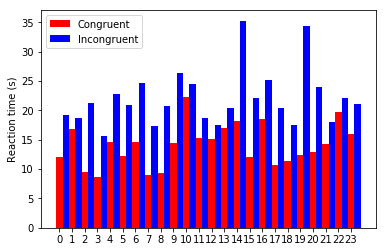

In [6]:
n=24
ind=np.arange(n)
width=0.5

fig=plt.figure()
ax=fig.add_subplot(111)
yvals=df['Congruent']
bar1=ax.bar(ind,yvals,width,color='r')

zvals=df['Incongruent']
bar2=ax.bar(ind+width,zvals,width,color='b')

ax.set_ylabel('Reaction time (s)')
ax.set_xticks(ind)
ax.legend((bar1[0],bar2[0]),('Congruent','Incongruent'))
plt.show()

In this plot one can see the incongruent times are all higher than the congruent times.

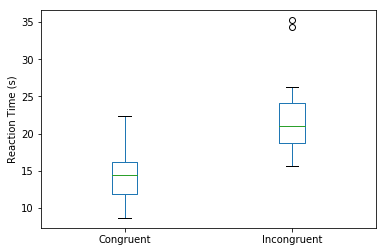

In [7]:
#box plot visualization 
df.plot.box()
plt.ylabel('Reaction Time (s)')
plt.show()

In this box plot one can see the incongruent times are higher as well.  It is also noted there are two outliers for the incongruent times.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
#run paired ttest
from scipy.stats import ttest_rel,t
a=df['Congruent']
b=df['Incongruent']
ttest_rel(a,b)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [9]:
#t-critical value with 95% confidence interval, 23 degrees of freedom
t.ppf(.95,23)

1.7138715277470473

-  t-statistic= 8.0201
-  t-critical= 1.7138
-  p-value= 4.103e-8

I ran a paired t-test with type 1 error rate of .05.  The t statistic of 8.0207
is greater than the critical value of 1.7138, thus rejecting the null hypothesis.  Further evidence is my p-value of 4.103e-08 is less than my type 1 error rate, thus indicating rejection of the null hypothesis.  By rejecting the null hypothesis we are saying the reaction time to name the ink colors of the congruent words is less than that of the incongruent words

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The effects observed is because adults brains can process reading faster than it can interpret a color and then say it.  If someone who knew colors but are not great readers(small children) were to perform the test, the results would be reversed.

referneces:
    -  https://matplotlib.org/examples/api/barchart_demo.html
    -  https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html
    